Zoe Erpelding, CPSC 322, Fall 2023, Notebook for HW-8

# Getting Started: Loading the libraries

In [1]:
from decision_tree import *
from data_table import *
from data_learn import *
from data_eval import *
from data_util import *

# Part 1: Random Forests

The goal of this part is to experiment with your random forest implementation, comparing it to the "plain-old" decision tree implementation from HW-7. In each step below, you will use the new "stratified holdout" method to create an inital training and testing set for the comparisons.  

 ## 1. MPG Dataset


TODO: Complete the following tasks for the mpg dataset. 

(a). Similar to the prior assignments, load and create a "clean" version of the mpg dataset with 3 mpg bin values.

(b). Create a train and test set using the stratified_holdout function. The test set should be 1/3 of the size of the training set.

(c). Run tdidt_eval on the mpg training and testing set to classify mpg labels using the cylinders, year, and origin features. 

(d). Print the confusion matrix along with (macro) accuracy and precision, recall, and f-measure scores. 

(e). Explore the use of different F, M, and N parameters to find a random forest that is on par or better than the decision tree results from above. For this step, use the random_forest_eval function with the corresponding training and testing set use above. Be sure to keep track of your findings as you go. You only need to include the "best" parameterization in the final notebook. Include the same metrics (confusion matrix, accuracy, precision, recall, and f-measure) as for (d).  

(f). Write down your observations concerning the comparison and the associated F, M, and N values (i.e., what happens as you change these). Note that since there are few features used for classification, F should have little impact (and few actual choices). However, you should see results with different N and M values. I was able to get up to N large values (over 200) without very much slowdown (but your results may vary).


In [2]:
auto = DataTable(['mpg','cyls','disp','hp','weight','accl','year','origin','name'])
auto.load('auto-mpg.txt')
auto = remove_duplicates(auto)
auto = remove_missing(auto, ['mpg','cyls','disp','hp','weight','accl','year','origin','name'])
width = (summary_stat(auto, 'mpg', max) - summary_stat(auto, 'mpg', min))/ 3
discretize(auto, 'mpg', [summary_stat(auto, 'mpg', min) + width, summary_stat(auto, 'mpg', min) + width + width])

In [3]:
train, test = stratified_holdout(auto, 'mpg', (1/3)*auto.row_count())

In [4]:
matrix = tdidt_eval(train, test, 'mpg', ['cyls', 'year', 'origin'])
print(matrix)

  actual    2    1    3
--------  ---  ---  ---
       2   27   13    1
       1    4   50    0
       3    7    0    1


In [5]:
avg_accuracy = (accuracy(matrix, 1)+accuracy(matrix,2)+accuracy(matrix,3))/3
print(f'The average accuracy of dt is {avg_accuracy}')
avg_precision = (precision(matrix, 1) + precision(matrix, 2) + precision(matrix, 3))/3
print(f'The average precision of dt is {avg_precision}')
avg_recall = (recall(matrix, 1) + recall(matrix,2) + recall(matrix,3))/3
print(f'The average recall of dt is {avg_recall}')
avg_fmeasure = (2*avg_recall*avg_precision)/(avg_recall+avg_precision)
print(f'The f-measure of dt is {avg_fmeasure}')

The average accuracy of dt is 0.8381877022653722
The average precision of dt is 0.6680590364800891
The average recall of dt is 0.5698208370972598
The f-measure of dt is 0.6150418429493705


In [6]:
matrix = random_forest_eval(auto, train, test, 3, 12, 36, 'mpg', ['cyls','year','origin'])
print(matrix)

  actual    2    1    3
--------  ---  ---  ---
       2   25   13    3
       1    4   50    0
       3    7    0    1


In [7]:
avg_accuracy = (accuracy(matrix, 1)+accuracy(matrix,2)+accuracy(matrix,3))/3
print(f'The average accuracy of dt is {avg_accuracy}')
avg_precision = (precision(matrix, 1) + precision(matrix, 2) + precision(matrix, 3))/3
print(f'The average precision of dt is {avg_precision}')
avg_recall = (recall(matrix, 1) + recall(matrix,2) + recall(matrix,3))/3
print(f'The average recall of dt is {avg_recall}')
avg_fmeasure = (2*avg_recall*avg_precision)/(avg_recall+avg_precision)
print(f'The f-measure of dt is {avg_fmeasure}')

The average accuracy of dt is 0.825242718446602
The average precision of dt is 0.5793650793650794
The average recall of dt is 0.5535606744956338
The f-measure of dt is 0.5661690062559558


From experimenting with the F, M, N values, I found that the F value played only a small role since there were so few columns to choose from the begin with, but maximizing the F value seemed to be the best option. As for the M and N values, I found that smaller values for M and N result in much less consistent accuracies. However, if they are both increased proportionally, the resulting accuracy doesn't change much. The optimized proportion that I found was around 1 to 1/3. The larger N and M chosen under this proportion, the better the results seem to be. 

## 2. Titanic Dataset

TODO: Repeat the steps (a-f) above for the titanic dataset.

In [8]:
titanic = DataTable(['class', 'age', 'gender', 'survival'])
titanic.load('titanic.txt')

In [9]:
train, test = stratified_holdout(titanic, 'survival', (1/3)*titanic.row_count())

In [10]:
matrix = tdidt_eval(train, test, 'survival', ['class', 'age', 'gender'])
print(matrix)

actual      yes    no
--------  -----  ----
yes         491     6
no          156    81


In [11]:
avg_accuracy = (accuracy(matrix, 'yes')+accuracy(matrix,'no'))/2
print(f'The average accuracy of decision tree is {avg_accuracy}')
avg_precision = (precision(matrix, 'yes') + precision(matrix, 'no'))/2
print(f'The average precision of decision tree is {avg_precision}')
avg_recall = (recall(matrix, 'yes') + recall(matrix,'no') )/2
print(f'The average recall of decision tree is {avg_recall}')
avg_fmeasure = (2*avg_recall*avg_precision)/(avg_recall+avg_precision)
print(f'The f-measure of decision tree is {avg_fmeasure}')

The average accuracy of decision tree is 0.779291553133515
The average precision of decision tree is 0.8449608271598359
The average recall of decision tree is 0.6648498586455441
The f-measure of decision tree is 0.7441622870731932


In [12]:
matrix = random_forest_eval(titanic, train, test, 3, 12, 36, 'survival', ['class', 'age', 'gender'])
print(matrix)

actual      yes    no
--------  -----  ----
yes         491     6
no          156    81


In [13]:
avg_accuracy = (accuracy(matrix, 'yes')+accuracy(matrix,'no'))/2
print(f'The average accuracy of decision tree is {avg_accuracy}')
avg_precision = (precision(matrix, 'yes') + precision(matrix, 'no'))/2
print(f'The average precision of decision tree is {avg_precision}')
avg_recall = (recall(matrix, 'yes') + recall(matrix,'no') )/2
print(f'The average recall of decision tree is {avg_recall}')
avg_fmeasure = (2*avg_recall*avg_precision)/(avg_recall+avg_precision)
print(f'The f-measure of decision tree is {avg_fmeasure}')

The average accuracy of decision tree is 0.779291553133515
The average precision of decision tree is 0.8449608271598359
The average recall of decision tree is 0.6648498586455441
The f-measure of decision tree is 0.7441622870731932


The F measure determination was the same for this as above since there were only 3 column options again. For M and N, I found that the 1/3 proportion still seemed to hold, but smaller numbers was necessary for efficiency in testing different values. 

## 3. Student Stress Dataset

TODO: Repeat the steps (a-f) again but for the student stress dataset. Note that the decision tree (tdidt_eval) has fairly good accuracy for this dataset (and to a large degree those above as well), and so it might be hard to "beat" with random forests. 

In [14]:
stress = DataTable(['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra', 'stress'])
stress.load('student-stress.txt')

In [15]:
train, test = stratified_holdout(stress, 'stress', (1/3)*stress.row_count())

In [16]:
matrix = tdidt_eval(train, test, 'stress', ['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra'])
print(matrix)

  actual    1    2    0
--------  ---  ---  ---
       1  108    9    3
       2   10  112    1
       0    8   12  105


In [17]:
avg_accuracy = (accuracy(matrix, 0)+accuracy(matrix,1)+accuracy(matrix,2))/3
print(f'The average accuracy of decision tree is {avg_accuracy}')
avg_precision = (precision(matrix, 0) + precision(matrix, 1)+precision(matrix, 2))/3
print(f'The average precision of decision tree is {avg_precision}')
avg_recall = (recall(matrix, 0) + recall(matrix,1)+recall(matrix,2))/3
print(f'The average recall of decision tree is {avg_recall}')
avg_fmeasure = (2*avg_recall*avg_precision)/(avg_recall+avg_precision)
print(f'The f-measure of decision tree is {avg_fmeasure}')

The average accuracy of decision tree is 0.9221014492753623
The average precision of decision tree is 0.8875169575314432
The average recall of decision tree is 0.8835230352303522
The f-measure of decision tree is 0.8855154929774138


In [67]:
matrix = random_forest_eval(stress, train, test, 6, 12, 36, 'stress', ['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra'])
print(matrix)

  actual    1    2    0
--------  ---  ---  ---
       1   99    8   13
       2    4  112    7
       0    3    9  113


In [66]:
avg_accuracy = (accuracy(matrix, 0)+accuracy(matrix,1)+accuracy(matrix,2))/3
print(f'The average accuracy of decision tree is {avg_accuracy}')
avg_precision = (precision(matrix, 0) + precision(matrix, 1)+precision(matrix, 2))/3
print(f'The average precision of decision tree is {avg_precision}')
avg_recall = (recall(matrix, 0) + recall(matrix,1)+recall(matrix,2))/3
print(f'The average recall of decision tree is {avg_recall}')
avg_fmeasure = (2*avg_recall*avg_precision)/(avg_recall+avg_precision)
print(f'The f-measure of decision tree is {avg_fmeasure}')

The average accuracy of decision tree is 0.9221014492753623
The average precision of decision tree is 0.8838331928469788
The average recall of decision tree is 0.8828807588075881
The f-measure of decision tree is 0.8833567190990795


This data seemed to fair the best with its results. Since there were more categorical columns, I was able to test different F values better. I found that a larger F value was usually better, but I settled on 6 since it seemed to yield the best results consistently. For the M and N values, I continued with the 1/3 proportion and a smaller numbers for efficiency sake. 

# Part 2: k-Means Clustering

The goal of this part is to experiment with your k-means implementation using the (simplified) UCI "iris" dataset (iris.txt in the starter code). 

## 1. Load the dataset

TODO: Load the iris.txt dataset as a DataTable. The columns of the table are: 
1. Sepal length (continuous values)
2. Sepal width (continuous values)
3. Petal length (continous values)
4. Petal width (continuous values)
5. Class (species name)

In [20]:
# todo: load iris.txt into a DataTable object

In [21]:
iris = DataTable(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
iris.load('iris.txt')

## 2. Create clusters

TODO: Using the iris data table and your HW8 k-means functions, find clusters for k = 2, k = 3, and k = 4 for the Sepal Width and Petal Width columns. For each of the three k values:  

(a). Call your select_k_random_centroids function to get k initial centroids. 

(b). Call your k_means algorithm using the initial centroids (and using Sepal Width and Petal Width). 

(c). Call the TSS function over the clusters returned. Print the corresponding cluster TSS values. 

(d). Repeat (a)-(c) and compare the results (i.e., with two different initial centroid instances). 

In [22]:
initial_centroids = select_k_random_centroids(iris, 2)
clusters = k_means(iris, initial_centroids, ['sepal width', 'petal width'])
tss_values = tss(clusters, ['sepal width', 'petal width'])
print(tss_values)

[7.677, 28.82399999999998]


In [23]:
initial_centroids = select_k_random_centroids(iris, 2)
clusters = k_means(iris, initial_centroids, ['sepal width', 'petal width'])
tss_values = tss(clusters, ['sepal width', 'petal width'])
print(tss_values)

[28.82399999999998, 7.677]


For k = 2, you get the same two different tss values when you run it different times. 

In [24]:
initial_centroids = select_k_random_centroids(iris, 3)
clusters = k_means(iris, initial_centroids, ['sepal width', 'petal width'])
tss_values = tss(clusters, ['sepal width', 'petal width'])
print(tss_values)

[7.4222641509433975, 6.89645833333333, 6.398367346938776]


In [25]:
initial_centroids = select_k_random_centroids(iris, 3)
clusters = k_means(iris, initial_centroids, ['sepal width', 'petal width'])
tss_values = tss(clusters, ['sepal width', 'petal width'])
print(tss_values)

[6.398367346938776, 7.4222641509433975, 6.89645833333333]


For k = 3, you get the same three different tss values when you run it different times. 

In [26]:
initial_centroids = select_k_random_centroids(iris, 4)
clusters = k_means(iris, initial_centroids, ['sepal width', 'petal width'])
tss_values = tss(clusters, ['sepal width', 'petal width'])
print(tss_values)

[3.5058536585365845, 3.8252941176470583, 6.398367346938776, 2.6880769230769226]


In [27]:
initial_centroids = select_k_random_centroids(iris, 4)
clusters = k_means(iris, initial_centroids, ['sepal width', 'petal width'])
tss_values = tss(clusters, ['sepal width', 'petal width'])
print(tss_values)

[1.5619047619047621, 1.7834482758620689, 6.214423076923078, 6.89645833333333]


For k = 4, you get different lists values each time you run it ranging from 0 to 30. 

## 3. Plotting clusters

TODO: Again using the iris data and the Sepal and Petal Width columns, write code below to: 

(a). Generate clusters for k=2, k=3, k=4, k=5, k=6, and k=7. 

(b). For each k, create a scatterplot showing the clusters. Each data point in a cluster should have the same color. The seven colors should be: 'b' (blue), 'r' (red), 'g' (green), 'c' (cyan), 'm' (magenta), 'y' (yellow), and 'k' (khaki). 

Note that within a particular figure---started with plt.figure()---you can call plt.plot(...) multiple times to display different sets of data points (e.g., each with a different color).

In [53]:
initial_centroids2 = select_k_random_centroids(iris, 2)
clusters2 = k_means(iris, initial_centroids2, ['sepal width', 'petal width'])

sepal1 = [row['sepal width'] for row in clusters2[0]]
petal1 = [row['petal width'] for row in clusters2[0]]
sepal2 = [row['sepal width'] for row in clusters2[1]]
petal2 = [row['petal width'] for row in clusters2[1]]


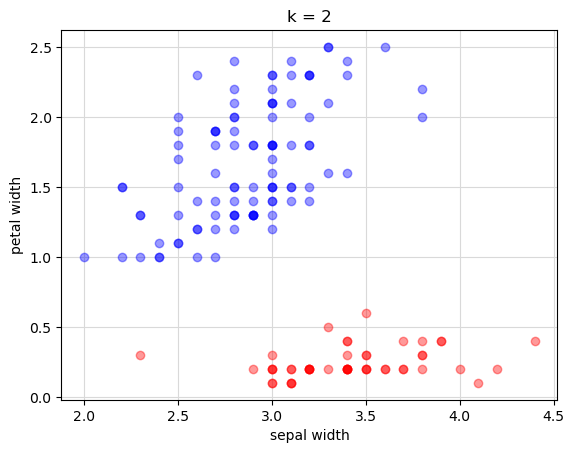

In [54]:
import matplotlib.pyplot as plt
plt.figure()
plt.grid(color='0.85', zorder=0)
plt.plot(sepal1, petal1, 'b.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal2, petal2, 'r.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.title('k = 2')
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.show()
plt.close()

In [55]:
initial_centroids3 = select_k_random_centroids(iris, 3)
clusters3 = k_means(iris, initial_centroids3, ['sepal width', 'petal width'])

sepal1 = [row['sepal width'] for row in clusters3[0]]
petal1 = [row['petal width'] for row in clusters3[0]]
sepal2 = [row['sepal width'] for row in clusters3[1]]
petal2 = [row['petal width'] for row in clusters3[1]]
sepal3 = [row['sepal width'] for row in clusters3[2]]
petal3 = [row['petal width'] for row in clusters3[2]]

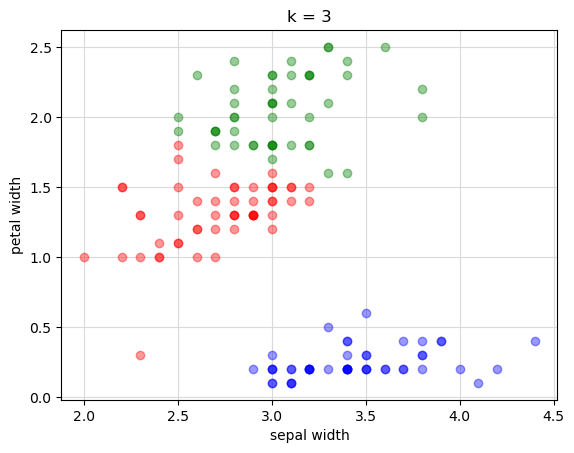

In [56]:
plt.figure()
plt.grid(color='0.85', zorder=0)
plt.plot(sepal1, petal1, 'b.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal2, petal2, 'r.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal3, petal3, 'g.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.title('k = 3')
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.show()
plt.close()

In [57]:
initial_centroids4 = select_k_random_centroids(iris, 4)
clusters4 = k_means(iris, initial_centroids4, ['sepal width', 'petal width'])

sepal1 = [row['sepal width'] for row in clusters4[0]]
petal1 = [row['petal width'] for row in clusters4[0]]
sepal2 = [row['sepal width'] for row in clusters4[1]]
petal2 = [row['petal width'] for row in clusters4[1]]
sepal3 = [row['sepal width'] for row in clusters4[2]]
petal3 = [row['petal width'] for row in clusters4[2]]
sepal4 = [row['sepal width'] for row in clusters4[3]]
petal4 = [row['petal width'] for row in clusters4[3]]

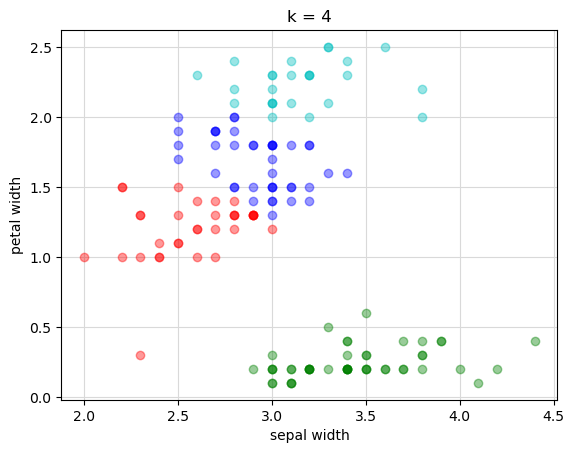

In [58]:
plt.figure()
plt.grid(color='0.85', zorder=0)
plt.plot(sepal1, petal1, 'b.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal2, petal2, 'r.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal3, petal3, 'g.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal4, petal4, 'c.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.title('k = 4')
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.show()
plt.close()

In [59]:
initial_centroids5 = select_k_random_centroids(iris, 5)
clusters5 = k_means(iris, initial_centroids5, ['sepal width', 'petal width'])

sepal1 = [row['sepal width'] for row in clusters5[0]]
petal1 = [row['petal width'] for row in clusters5[0]]
sepal2 = [row['sepal width'] for row in clusters5[1]]
petal2 = [row['petal width'] for row in clusters5[1]]
sepal3 = [row['sepal width'] for row in clusters5[2]]
petal3 = [row['petal width'] for row in clusters5[2]]
sepal4 = [row['sepal width'] for row in clusters5[3]]
petal4 = [row['petal width'] for row in clusters5[3]]
sepal5 = [row['sepal width'] for row in clusters5[4]]
petal5 = [row['petal width'] for row in clusters5[4]]

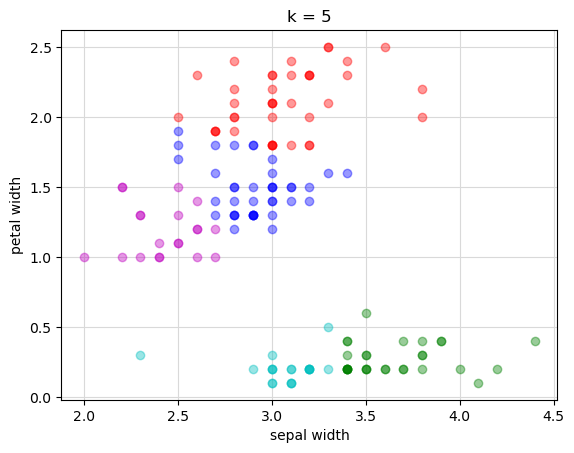

In [60]:
plt.figure()
plt.grid(color='0.85', zorder=0)
plt.plot(sepal1, petal1, 'b.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal2, petal2, 'r.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal3, petal3, 'g.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal4, petal4, 'c.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal5, petal5, 'm.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.title('k = 5')
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.show()
plt.close()

In [61]:
initial_centroids6 = select_k_random_centroids(iris, 6)
clusters6 = k_means(iris, initial_centroids6, ['sepal width', 'petal width'])

sepal1 = [row['sepal width'] for row in clusters6[0]]
petal1 = [row['petal width'] for row in clusters6[0]]
sepal2 = [row['sepal width'] for row in clusters6[1]]
petal2 = [row['petal width'] for row in clusters6[1]]
sepal3 = [row['sepal width'] for row in clusters6[2]]
petal3 = [row['petal width'] for row in clusters6[2]]
sepal4 = [row['sepal width'] for row in clusters6[3]]
petal4 = [row['petal width'] for row in clusters6[3]]
sepal5 = [row['sepal width'] for row in clusters6[4]]
petal5 = [row['petal width'] for row in clusters6[4]]
sepal6 = [row['sepal width'] for row in clusters6[5]]
petal6 = [row['petal width'] for row in clusters6[5]]

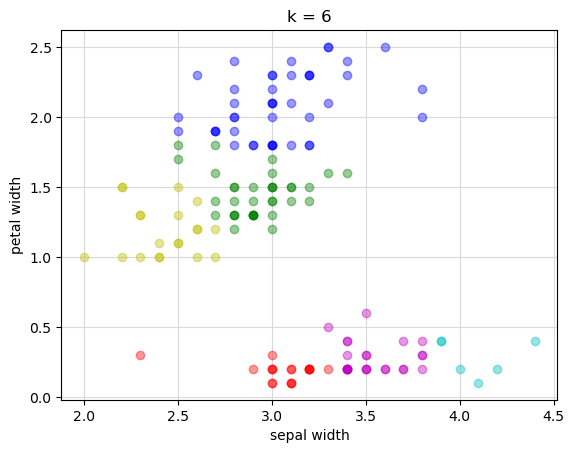

In [62]:
plt.figure()
plt.grid(color='0.85', zorder=0)
plt.plot(sepal1, petal1, 'b.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal2, petal2, 'r.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal3, petal3, 'g.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal4, petal4, 'c.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal5, petal5, 'm.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal6, petal6, 'y.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.title('k = 6')
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.show()
plt.close()

In [63]:
initial_centroids7 = select_k_random_centroids(iris, 7)
clusters7 = k_means(iris, initial_centroids7, ['sepal width', 'petal width'])

sepal1 = [row['sepal width'] for row in clusters7[0]]
petal1 = [row['petal width'] for row in clusters7[0]]
sepal2 = [row['sepal width'] for row in clusters7[1]]
petal2 = [row['petal width'] for row in clusters7[1]]
sepal3 = [row['sepal width'] for row in clusters7[2]]
petal3 = [row['petal width'] for row in clusters7[2]]
sepal4 = [row['sepal width'] for row in clusters7[3]]
petal4 = [row['petal width'] for row in clusters7[3]]
sepal5 = [row['sepal width'] for row in clusters7[4]]
petal5 = [row['petal width'] for row in clusters7[4]]
sepal6 = [row['sepal width'] for row in clusters7[5]]
petal6 = [row['petal width'] for row in clusters7[5]]
sepal7 = [row['sepal width'] for row in clusters7[6]]
petal7 = [row['petal width'] for row in clusters7[6]]

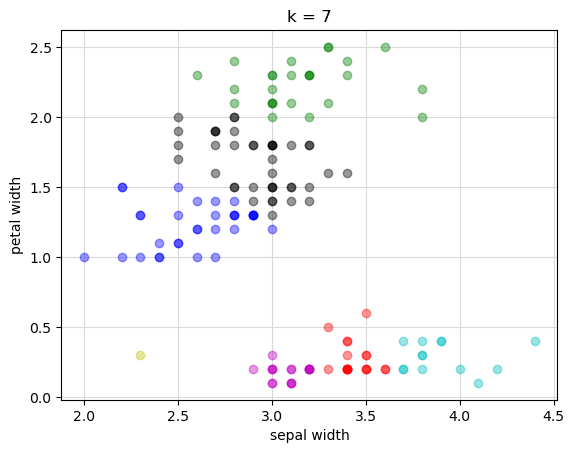

In [64]:
plt.figure()
plt.grid(color='0.85', zorder=0)
plt.plot(sepal1, petal1, 'b.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal2, petal2, 'r.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal3, petal3, 'g.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal4, petal4, 'c.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal5, petal5, 'm.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal6, petal6, 'y.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot(sepal7, petal7, 'k.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.title('k = 7')
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.show()
plt.close()

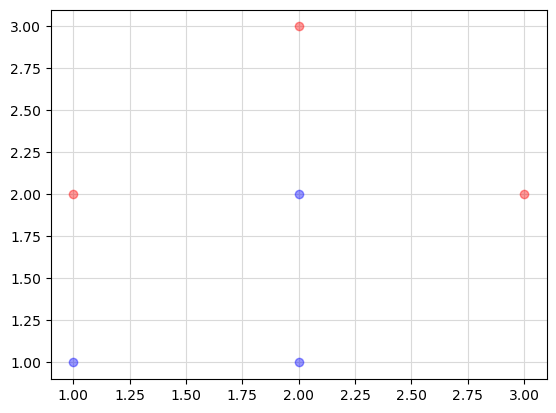

In [34]:
# the following is example code that you can adapt for plotting your clusters: 

import matplotlib.pyplot as plt

plt.figure()
plt.grid(color='0.85', zorder=0)
plt.plot([1,2,2], [1,1,2], 'b.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([1,2,3], [2,3,2], 'r.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.show()
plt.close()

The following is an example of what your k=7 scatterplot should look like: 

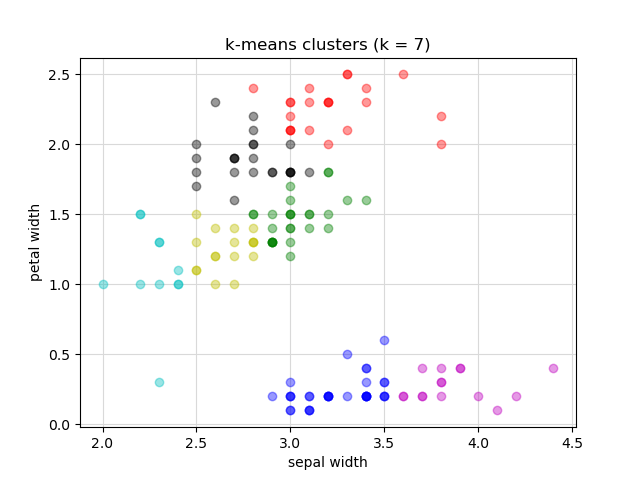

# Issues, Challenges, and Observations

*TODO: Write down any issues and/or challenges that you had with the assignment. In addition, write down any additional observations beyond what you provided above (as warranted).*

I had some struggles with the random forest function, however, I eventually got it to work correctly. When writing the notebook, I found more hiccups than expected because there were so many variables/column names that there was a lot of room for error. There were a few data and function interactions that would occassionally go wrong, but then work the next time it ran, so I couldn't figure out the reason for that. All my functions seem to work correctly, so there may be low probability issues that arise every once in a while. 

I enjoyed the k means and clustering parts of this assignment and found the visualizations to be helpful and interesting. I observed that due to the natural clustering of the data, for certain k values, the clusters would always come out the same. For our data set, this was true for k = 2 and k = 3. 